## Wine Quality Data Set


**Abstract**: Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], [Web Link]).

### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)


**LInk**: http://archive.ics.uci.edu/ml/datasets/Wine+Quality


In [1]:
import pandas as pd
import numpy as np
#import matplotlib
#matplotlib.use("TKAgg")
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


Bad key “backend in file /Users/uday625/.matplotlib/matplotlibrc, line 1 ('“backend: TkAgg”')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
sns.set_style("darkgrid")

In [3]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [4]:
DATASET='Dataset/wine/winequality.csv'

In [5]:
df = pd.read_csv (DATASET)

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [9]:
df['quality'].unique().tolist()

[5, 6, 7, 4, 8, 3, 9]

In [33]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

<AxesSubplot:>

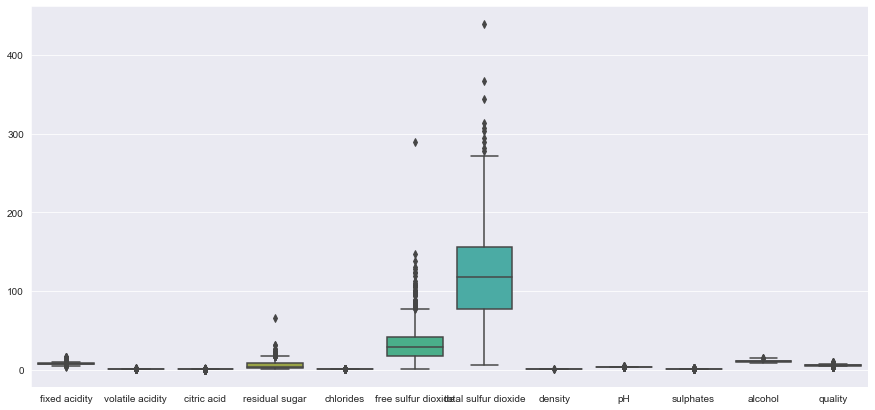

In [38]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df)

/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

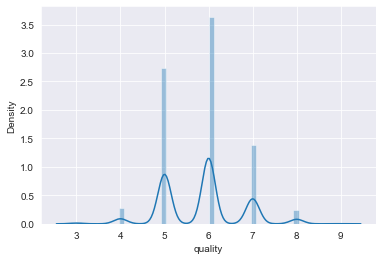

In [25]:
sns.distplot(df.quality)

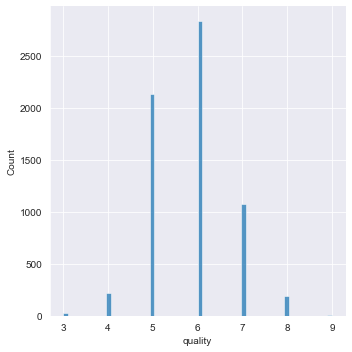

In [27]:
sns.displot(df.quality)

<AxesSubplot:xlabel='quality', ylabel='Count'>

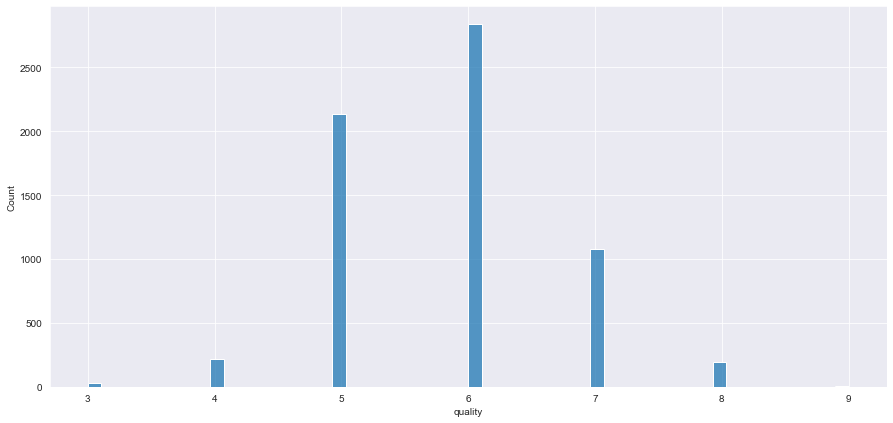

In [32]:
plt.figure(figsize=(15, 7))
sns.histplot(df.quality)

In [33]:
colors = ['#78C850',  # Grass
            '#F08030',  # Fire
            '#6890F0',  # Water
            '#A8B820',  # Bug
            '#A8A878',  # Normal
            '#A040A0',  # Poison
            '#F8D030',  # Electric
            '#E0C068',  # Ground
            '#EE99AC',  # Fairy
            '#C03028',  # Fighting
            '#F85888',  # Psychic
            '#B8A038',  # Rock
            '#705898',  # Ghost
            '#98D8D8',  # Ice
            '#7038F8',  # Dragon
        ]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8'),
  Text(6, 0, '9')])

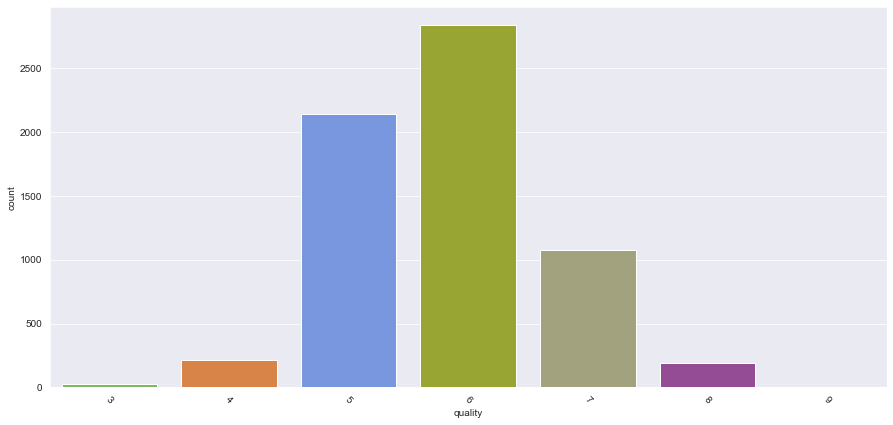

In [37]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(15, 7))
sns.countplot(x='quality', data=df, palette=colors) 
# Rotate x-labels
plt.xticks(rotation=-45)

In [43]:
#split dataset in features and target variable
feature_cols = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = df[feature_cols] # Features
y = df.quality # Target variable

In [44]:
X

fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4              0.70             1.9      0.076   
1               7.8              0.88             2.6      0.098   
2               7.8              0.76             2.3      0.092   
3              11.2              0.28             1.9      0.075   
4               7.4              0.70             1.9      0.076   
...             ...               ...             ...        ...   
6492            6.2              0.21             1.6      0.039   
6493            6.6              0.32             8.0      0.047   
6494            6.5              0.24             1.2      0.041   
6495            5.5              0.29             1.1      0.022   
6496            6.0              0.21             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 10 columns]

In [45]:
y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [46]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [48]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5717948717948718


In [49]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [50]:
print('min_samples_leaf\t:', clf.get_params()['min_samples_leaf'])
print('min_samples_split\t:', clf.get_params()['min_samples_split'])
print('max_depth\t\t:', clf.tree_.max_depth)
print('node_count\t\t:', clf.tree_.node_count)

min_samples_leaf	: 1
min_samples_split	: 2
max_depth		: 26
node_count		: 2481


In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus

/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.318507 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.318507 to fit



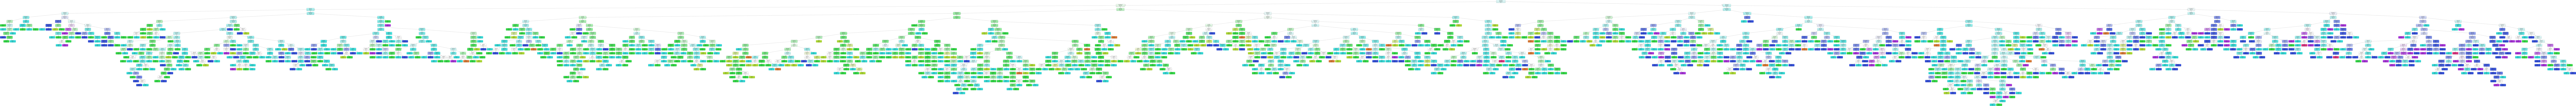

In [16]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['5', '6', '7', '4', '8', '3', '9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wineQuality.png')
Image(graph.create_png())

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5441025641025641


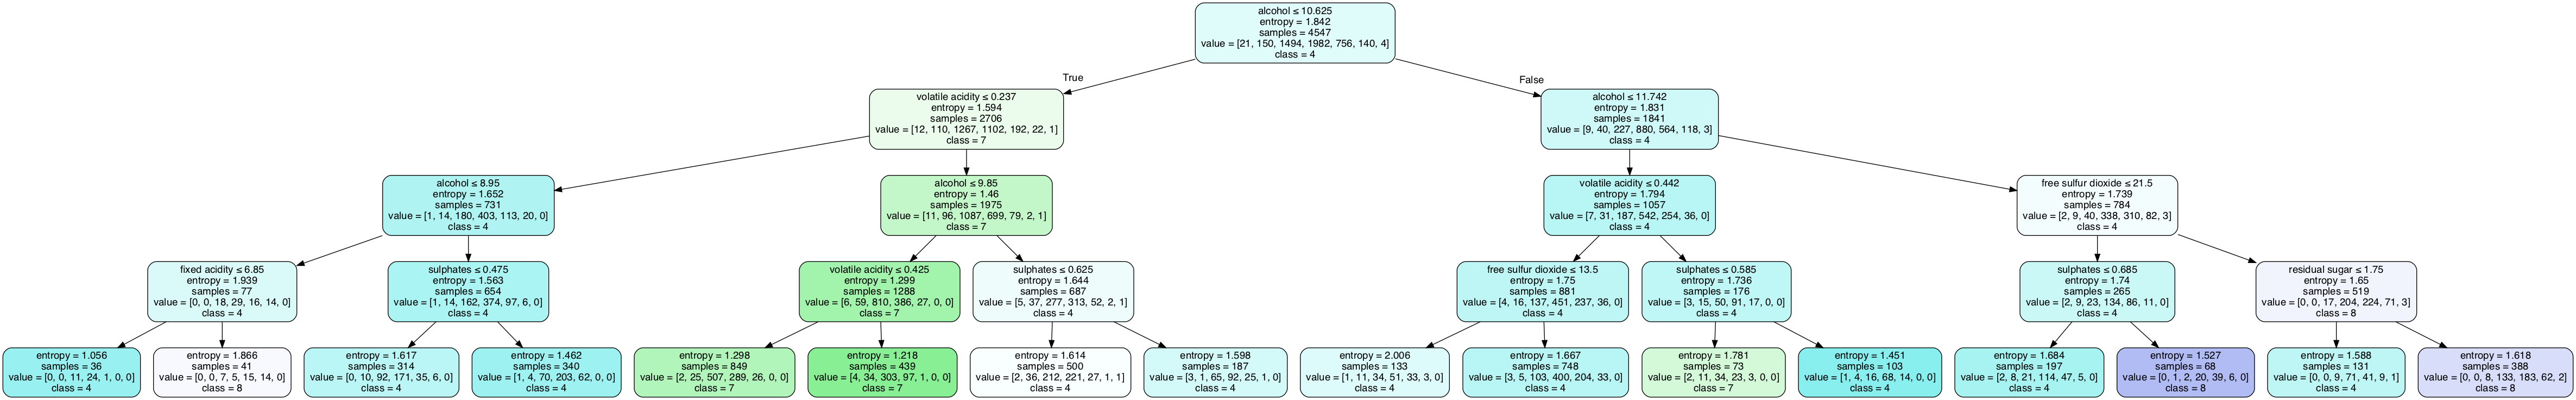

In [52]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['5', '6', '7', '4', '8', '3', '9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wineQuality.png')
Image(graph.create_png())

In [43]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5446153846153846


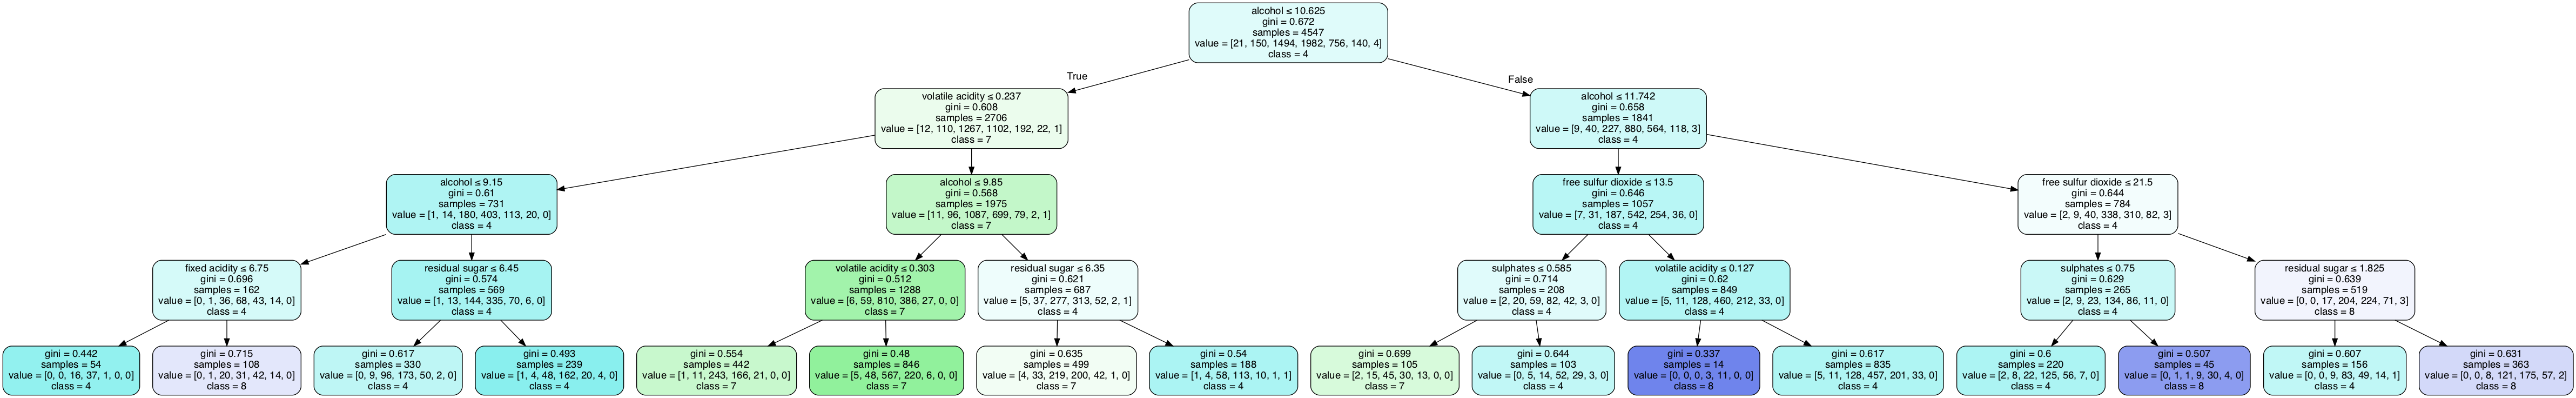

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['5', '6', '7', '4', '8', '3', '9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wineQuality.png')
Image(graph.create_png())

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=4, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5441025641025641


In [23]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [25]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

In [26]:
X = df.drop('quality', axis=1)
X = pd.get_dummies(X.astype(str))
y = df[['quality']]
print("X encoded has {} rows and {} features".format(*X.shape))
X.head()

X encoded has 6497 rows and 2651 features


fixed acidity_10.0  fixed acidity_10.1  fixed acidity_10.2  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.3  fixed acidity_10.4  fixed acidity_10.5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.6  fixed acidity_10.7  fixed acidity_10.8  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.9  ...  alcohol_9.55  alcohol_9.56666666666667  \
0                   0  ...             0                         0   
1                   0  ...             0                         0   
2                   0  ...             0                         0   
3                   0  ...             0                         0   
4                   0  ...             0                         0   

   alcohol_9.6  alcohol_9.63333333333333  alcohol_9.7  \
0            0                         0            0   
1            0                         0            0   
2            0                         0            0   
3            0                         0            0   
4            0                         0            0   

   alcohol_9.73333333333333  alcohol_9.75  alcohol_9.8  alcohol_9.9  \
0                         0             0            0            0   
1                         0             0            1            0   
2                         0             0            1            0   
3                         0             0            1            0   
4                         0             0            0            0   

   alcohol_9.95  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 2651 columns]

In [29]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]

In [31]:
print(X.shape,y.shape)

(6497, 2651) (6497, 1)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1769)

In [33]:
print("Shape of X_train\t:", X_train.shape)
print("Shape of X_test\t\t:", X_test.shape)
print("Shape of y_train\t:", y_train.shape)
print("Shape of y_test\t\t:", y_test.shape)

Shape of X_train	: (4547, 2651)
Shape of X_test		: (1950, 2651)
Shape of y_train	: (4547, 1)
Shape of y_test		: (1950, 1)


In [34]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2)

In [35]:
from sklearn.tree import DecisionTreeClassifier
#tree = DecisionTreeClassifier()
tree = DecisionTreeClassifier(criterion="entropy",max_depth=10, random_state=0)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(y_pred[1:5])

[6 6 5 6]


In [36]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [37]:
print('min_samples_leaf\t:', tree.get_params()['min_samples_leaf'])
print('min_samples_split\t:', tree.get_params()['min_samples_split'])
print('max_depth\t\t:', tree.tree_.max_depth)
print('node_count\t\t:', tree.tree_.node_count)

min_samples_leaf	: 1
min_samples_split	: 2
max_depth		: 10
node_count		: 209


In [38]:
print('Self Score\t:', tree.score(X_train, y_train))
print("Accuracy\t:", metrics.accuracy_score(y_test, y_pred))
print("Precision\t:", metrics.precision_score(y_test, y_pred, average="weighted"))

Self Score	: 0.5425555311194193
Accuracy	: 0.5046153846153846
Precision	: 0.5472993618730546


/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
#%aimport visuals
import visuals_2 as vs

In [110]:
vs.render_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.14      0.11      0.12        62
           5       0.56      0.64      0.60       601
           6       0.56      0.59      0.57       868
           7       0.49      0.37      0.42       353
           8       0.26      0.17      0.21        52
           9       0.00      0.00      0.00         5

    accuracy                           0.53      1950
   macro avg       0.29      0.27      0.27      1950
weighted avg       0.52      0.53      0.52      1950



/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Shape of passed values is (7, 7), indices imply (2, 2)

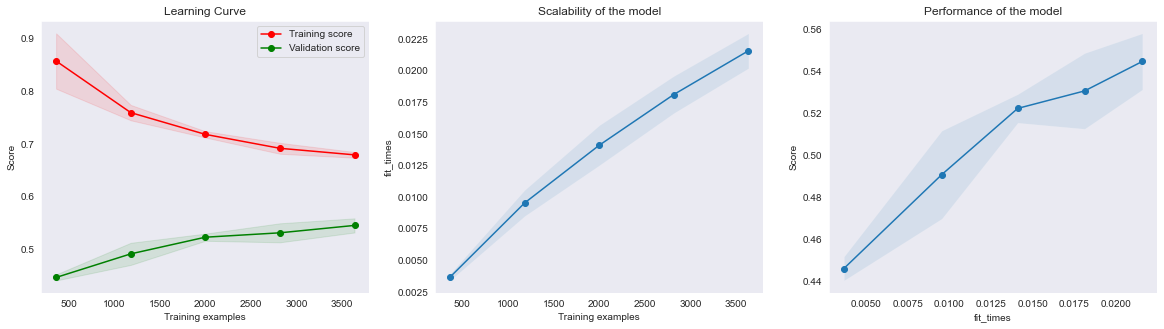

In [111]:
vs.plot_learning_curve(naive_est, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]
[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]
[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


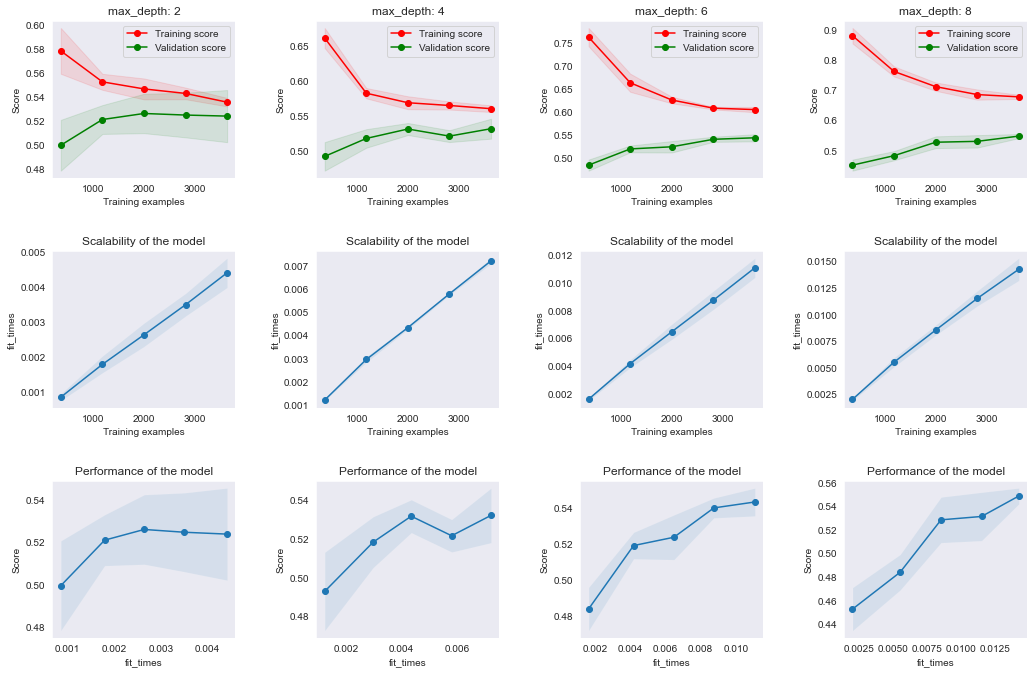

In [112]:
vs.plot_learning_curve_all(
    naive_est,
    X_train,
    y_train,
    param='max_depth',
    values=[2,4,6,8],
    cv=cv,
    n_jobs=-1,
    verbose=1
)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 9248 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 13792 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 16492 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 19792 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:   31.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


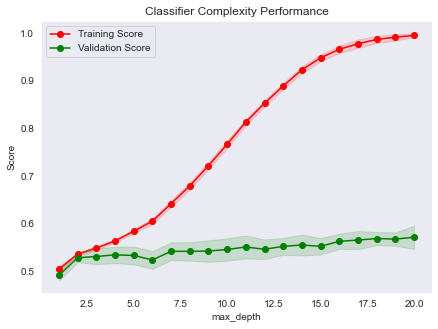

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


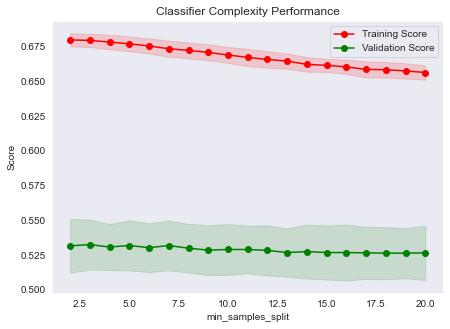

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


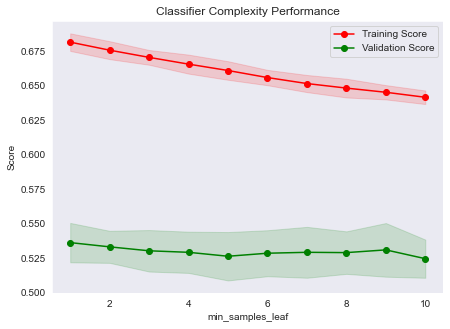

Best score from the Grid Search: 0.5716483516483516


In [113]:
param = {
    "max_depth": range(1,21),
    "min_samples_split": range(1,21),
    "min_samples_leaf": range(1,11)
}

grid = vs.grid_search_and_plot(
    estimator=naive_est,
    X=X_train, 
    y=y_train,
    param=param,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    plot=True
)

In [114]:
grid.best_params_

{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [115]:
gs_est = grid.best_estimator_
y_pred = gs_est.predict(X_test)

In [116]:
print('Self Score\t:', gs_est.score(X_train, y_train))
print("Accuracy\t:", metrics.accuracy_score(y_test, y_pred))
print("Precision\t:", metrics.precision_score(y_test, y_pred, average="weighted"))

Self Score	: 0.9894435891796789
Accuracy	: 0.5820512820512821
Precision	: 0.5814510586977171


/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
print('min_samples_leaf\t:', gs_est.get_params()['min_samples_leaf'])
print('min_samples_split\t:', gs_est.get_params()['min_samples_split'])
print('max_depth\t\t:', gs_est.tree_.max_depth)
print('node_count\t\t:', gs_est.tree_.node_count)

min_samples_leaf	: 1
min_samples_split	: 2
max_depth		: 19
node_count		: 2369


In [118]:
vs.render_confusion_matrix(y_test, y_pred, ratio=False)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.22      0.23      0.22        62
           5       0.61      0.64      0.63       601
           6       0.64      0.61      0.63       868
           7       0.52      0.54      0.53       353
           8       0.25      0.29      0.27        52
           9       0.00      0.00      0.00         5

    accuracy                           0.58      1950
   macro avg       0.32      0.33      0.32      1950
weighted avg       0.58      0.58      0.58      1950



/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Shape of passed values is (7, 7), indices imply (2, 2)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

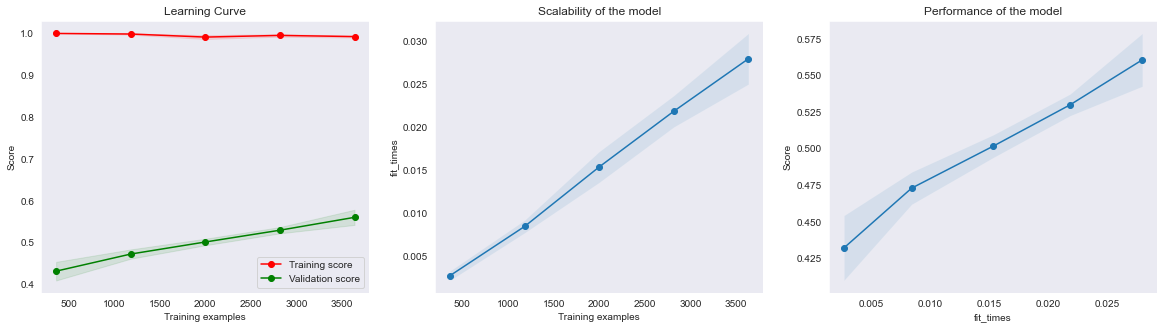

In [119]:
vs.plot_learning_curve(gs_est, X_train, y_train, cv=cv, n_jobs=-1)

In [121]:
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

def render_tree(filename, featureNames, classNames, estimator):
    dot_data = tree.export_graphviz(
        estimator,
        feature_names=featureNames,
        class_names=classNames,
        special_characters=True,
        filled=False,
        rounded=False
    )
    
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100,200))
    plt.imshow(img,interpolation = 'nearest')
    plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.395374 to fit



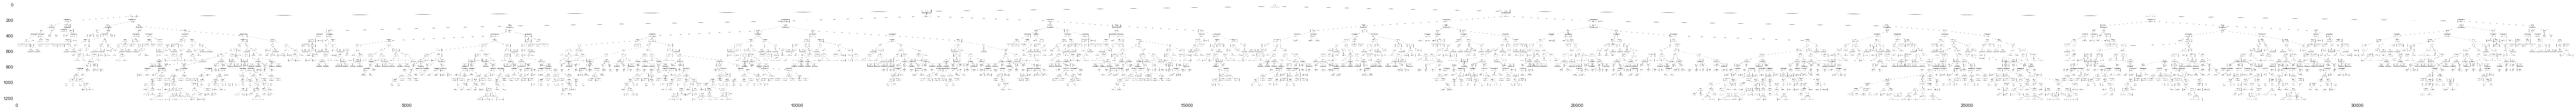

In [125]:
render_tree(
    filename='grid_searched_encoded_dt_final.png',
    featureNames=X.columns,
    classNames=['5', '6', '7', '4', '8', '3', '9'],
    estimator=gs_est
)

In [53]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

In [55]:
X = df.drop('quality', axis=1)
X = pd.get_dummies(df.astype(str))
y = df[['quality']]
print("X encoded has {} rows and {} features".format(*X.shape))
X.head()

X encoded has 6497 rows and 2658 features


fixed acidity_10.0  fixed acidity_10.1  fixed acidity_10.2  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.3  fixed acidity_10.4  fixed acidity_10.5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.6  fixed acidity_10.7  fixed acidity_10.8  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.9  ...  alcohol_9.8  alcohol_9.9  alcohol_9.95  quality_3  \
0                   0  ...            0            0             0          0   
1                   0  ...            1            0             0          0   
2                   0  ...            1            0             0          0   
3                   0  ...            1            0             0          0   
4                   0  ...            0            0             0          0   

   quality_4  quality_5  quality_6  quality_7  quality_8  quality_9  
0          0          1          0          0          0          0  
1          0          1          0          0          0          0  
2          0          1          0          0          0          0  
3          0          0          1          0          0          0  
4          0          1          0          0          0          0  

[5 rows x 2658 columns]

In [70]:
y = df[['quality']]

In [73]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = ((df[feature_name] - min_value) / (max_value - min_value))
    return result

In [86]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [74]:
m = normalize(y)

NameError: name 'mod' is not defined

In [72]:
m

quality
0     0.333333
1     0.333333
2     0.333333
3     0.500000
4     0.333333
...        ...
6492  0.500000
6493  0.333333
6494  0.500000
6495  0.666667
6496  0.500000

[6497 rows x 1 columns]

In [75]:
#from lightgbm import LGBMRegressor
from category_encoders import OrdinalEncoder

In [105]:
#X = OrdinalEncoder(cols=[3]).fit_transform(X)

In [77]:
from sklearn import datasets
import numpy as np, pandas as pd
iris = datasets.load_iris()
X = iris.data  



In [97]:
###Case 1 - Target as 0,1,2
y = iris.target
###Case 2 - Target as 31,41,71
#y = pd.Series(iris.target).map({0:31,1:41,2:71})

y = df[['quality']]

In [98]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]

In [102]:
df[['quality']] = df['quality'].apply(lambda x : (x - x) if int(x) < 6 else ((x - x) + 1))

In [103]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
6492     11.2        1  
6493      9.6        0  
6494      9.4        1  
6495     12.8        1  
6496     11.8        1  

[6497 rows x 12 columns]

In [104]:
df['quality'].unique()

array([0, 1])

In [100]:
###Case 3 - Target as OneHot
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y.reshape(-1,1))

In [101]:
ohe

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
model.score(x_test, y_test), model.predict(x_test)